# Example of the PS-DTFE in Julia

In [1]:
using JLD, Plots

include("PS-DTFE.jl")

# Set up box
Ni = 256
L = 25.
m = (L / Ni) ^ 2

# Load data
positions_initial = load("data/positions_initial.jld", "data")
positions = load("data/positions.jld", "data")
velocities = load("data/velocities.jld", "data")

density(estimator, range) = [density([x, y], estimator) for y in range, x in range]
numberOfStreams(estimator, range) = [numberOfStreams([x, y], estimator) for y in range, x in range]

nothing

In [2]:
# Evaluate density estimator
box = [0.  L; 0. L]
depth = 10

estimator = PS_DTFE(positions_initial, positions, velocities, m, depth, box)

p = [0.5 * L, 0.5 * L] 

println("density: ", density(p, estimator))
println("velocity: ", v(p, estimator))
println("number of streams: ", numberOfStreams(p, estimator))

density: 0.2473399718189821
simplex_indices = [87850]
velocity: [200.8192267124689 39.45519109057685]
number of streams: 1


Delaunay Tesselation Field Estimator

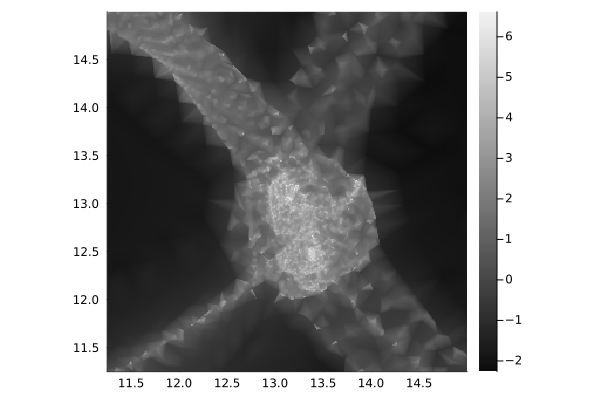

In [3]:
rangeX = 0.45 * L : L / (8. * Ni) : 0.6 * L
estimator_dtfe = PS_DTFE(positions, positions, velocities, m, depth, box)
rho_dtfe = density(estimator_dtfe, rangeX)
heatmap(rangeX, rangeX, log.(rho_dtfe), aspect_ratio=:equal, xlims=(minimum(rangeX), maximum(rangeX)), ylims=(minimum(rangeX), maximum(rangeX)), c=:grays)

Phase-Space Delaunay Tessellation Field Estimator

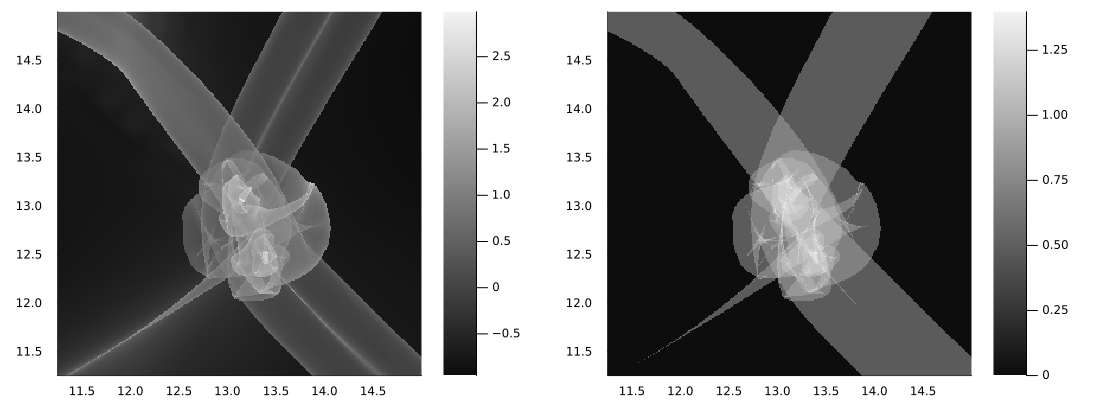

In [4]:
rangeX = 0.45 * L : L / (8. * Ni) : 0.6 * L
rho = density(estimator, rangeX)
number = numberOfStreams(estimator, rangeX)

pl1 = heatmap(rangeX, rangeX, log10.(rho), aspect_ratio=:equal, xlims=(minimum(rangeX), maximum(rangeX)), ylims=(minimum(rangeX), maximum(rangeX)), c=:grays)
pl2 = heatmap(rangeX, rangeX, log10.(number), aspect_ratio=:equal, xlims=(minimum(rangeX), maximum(rangeX)), ylims=(minimum(rangeX), maximum(rangeX)), c=:grays)

plot(pl1, pl2, layout = grid(1, 2), size=(1100, 400))

The code works with periodic boundary conditions, as we can see from this density field evaluated in the complete box

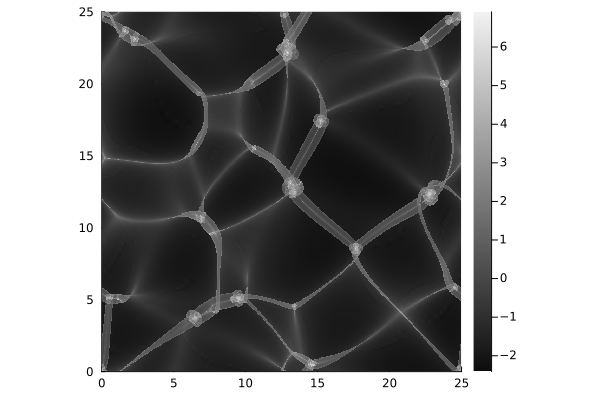

In [5]:
rangeX = 0 : L / (4. * Ni) : L
rho = density(estimator, rangeX)
heatmap(rangeX, rangeX, log.(rho), aspect_ratio=:equal, xlims=(minimum(rangeX), maximum(rangeX)), ylims=(minimum(rangeX), maximum(rangeX)), c=:grays)